In [1]:
import numpy as np
np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


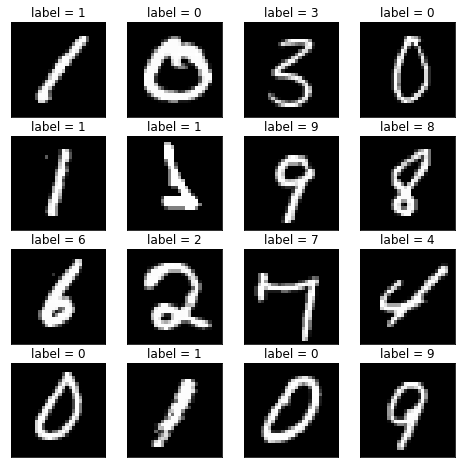

In [2]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(train_data.loc[i*37 + j*23, 'pixel0':].to_numpy().reshape(28, 28), cmap = 'gray')
        ax[i, j].set_title('label = %s' % (train_data.loc[i*37 + j*23, 'label']))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
train_data

Training data consists of 42000 training examples.  
Each training example is a 28x28 gray-scale images with a number from 0 to 9.  
For convenience each image was reshaped from 28x28 matrix into 28^2 = 784-element row.  
Each pixel has a single pixel-value associated with it,  
indicating the lightness or darkness of that pixel, with higher numbers meaning darker.  
  

Data should be normalized

In [3]:
train_data.loc[:, 'pixel0':'pixel783'] = (train_data.loc[:, 'pixel0':'pixel783'] - train_data.loc[:, 'pixel0':'pixel783'].mean(axis = 0)) / 255
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
41996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
41997,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0
41998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00086,-0.000459,-0.000231,-0.000079,-0.000068,-0.000011,0.0,0.0,0.0,0.0


# Building a network

We will build an L-layer network, final *number of layers L* will be defined according to the perfomance.  

Building steps:  

- Initialize parameters  
- Forward propagation
- Compute cost with L2 regularization
- Backward propagation
- Update parameters
- Train model
- Make a prediction with trained parameters

In [4]:
def sigmoid(Z):
    """
    Arguments:
    Z - a scalar or numpy array of any size
    
    Return:
    sigmoid(Z)
    """
    
    return 1/(1 + np.exp(-Z))

In [5]:
def softmax(Z):
    """
    Arguments:
    Z - a numpy array of any size
    
    Return:
    softmax(Zi) = exp(Zi) / sum(exp(Zi))
    """
    
    A = np.exp(Z) / np.sum(np.exp(Z), axis = 0)
    
    return A

In [6]:
def random_mini_batches(X, Y, mini_batch_size = 256):
    """
    Create a list of random mini batches from (X, Y)
    
    Arguments:
    X - dataset, size = (n, m)
    Y - label vecor, size = (number of labels, m)
    
    Return:
    mini_batches - list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]
    mini_batches = list()
    
    permutation = list(np.random.permutation(m)) # create a list of permutations
    shuffled_X = X.iloc[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0], m))
    
    # Partition
    num_complete_minibatches = np.floor(m/mini_batch_size).astype(int)
    for k in range(num_complete_minibatches):
        
        mini_batch_X = shuffled_X.iloc[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    # Handling the end casse (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X.iloc[:, mini_batch_size*(m // mini_batch_size) : ]
        mini_batch_Y = shuffled_Y[:, mini_batch_size*(m // mini_batch_size) : ]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [7]:
def initialize_parameters(dims):
    """
    Arguments:
    dims - list of the dimensions of layers, the first element is number of features,
        the last is a number of labels, type = list
    
    Return:
    parameters - Wi - weights, bi - bias term for i-th layer, type = dict
    parameters = {..., Wi : , bi : , ...}
    """
    
    L = len(dims) - 1 # The input layer doesn't count in layer number
    parameters = dict()
    
    for l in range(L):
        
        parameters['W'+str(l+1)] = np.random.randn(dims[l+1], dims[l]) * 0.01
        parameters['b'+str(l+1)] = np.zeros((dims[l+1], 1))
        
    return parameters

In [8]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X - dataset
    parameters - dictionary with W - weights, b - bias term
    L - number of layers
    
    Return:
    forward_cache - dictionary with Zi and Ai values
    """
    L = len(parameters) // 2
    forward_cache = {'A0' : X, 'Z0' : X}
    
    for l in range(L - 1):
        
        forward_cache['Z'+str(l+1)] = np.dot(parameters['W'+str(l+1)], forward_cache['A'+str(l)]) + parameters['b'+str(l+1)]
        forward_cache['A'+str(l+1)] = sigmoid(forward_cache['Z'+str(l+1)])
    
    forward_cache['Z' + str(L)] = np.dot(parameters['W'+str(L)], forward_cache['A'+str(L-1)]) + parameters['b'+str(L)]
    forward_cache['A' + str(L)] = softmax(forward_cache['Z' + str(L)])
    
    return forward_cache

In [9]:
def compute_cost(A, Y, parameters, lambd):
    """
    Arguments:
    A - an output layer value
    Y - true label
    parameters - weights and bias terms
    lambd - regularization hyperparameter
    
    Return:
    cost - cross-entropy cost
    """
    reg = 0
    
    for l in range(len(parameters)//2):
        reg += np.sum(parameters['W'+str(l+1)]**2)
    
    cost = -1 * np.sum(Y*np.log(A)) + lambd/2 * reg
    
    return cost

In [10]:
def backward_propagation(Y, forward_cache, parameters, lambd):
    """
    Arguments:
    forward_cache - dictionary with Zi and Ai
    parameters - weights and bias terms
    lambd - regularization hyperparameter
    
    Return:
    grads - dictionary with dWi and dbi
        dWi - derivative of loss with the respect to Wi
        dbi - derivative of loss with the respect to bi
    """
    
    m = Y.shape[1]
    
    L = len(parameters) // 2
    grads = {'dZ'+str(L) : forward_cache['A'+str(L)] - Y}
    dZL = grads['dZ' + str(L)]
    grads['dW'+str(L)] = 1/m * np.dot(dZL, forward_cache['A' + str(L-1)].T) + lambd/m * parameters['W'+str(L)]
    grads['db'+str(L)] = 1/m * np.sum(dZL, axis = 1, keepdims = True)
    
    for l in range(L - 1, 0, -1):
        
        grads['dZ'+str(l)] = 1/m * np.dot(parameters['W' + str(l+1)].T, grads['dZ'+str(l+1)])*forward_cache['A'+str(l)]*(1-forward_cache['A'+str(l)])
        grads['dW'+str(l)] = 1/m * np.dot(grads['dZ'+str(l)], forward_cache['A'+str(l-1)].T)+lambd/m*parameters['W'+str(l)]
        grads['db'+str(l)] = 1/m * np.sum(grads['dZ'+str(l)], axis = 1, keepdims = True)
        
    return grads

In [11]:
def initialize_adam(parameters):
    """
    Arguments:
    parameters - dictionary with W - weights, b - bias terms
    
    Return:
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...
    """
    
    L = len(parameters) // 2
    v = dict()
    s = dict()
    
    
    for l in range(L):
        
        v["dW" + str(l+1)] = np.zeros((parameters['W' + str(l+1)].shape[0], parameters['W' + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters['b' + str(l+1)].shape[0], parameters['b' + str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters['W' + str(l+1)].shape[0], parameters['W' + str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters['b' + str(l+1)].shape[0], parameters['b' + str(l+1)].shape[1]))
    
    return v, s

In [12]:
def update_parameters(parameters, grads, learning_rate):
    """
    Arguments:
    parameters - weigths and bias terms, dictionary
    grads - dictionary with derivatives dW and db
    learning_rate - learning rate hyperparameter, scalar
    
    Return:
    updated parameters
    """
    
    L = len(parameters) // 2
    
    for l in range(L):
        
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - learning_rate * grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate * grads['db'+str(l+1)]
        
    return parameters

In [13]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1 = 0.9, beta2 = 0.999,  epsilon = 10**(-8)):
    """
    Arguments:
    parameters - python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads - python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v - Adam variable, moving average of the first gradient, python dictionary
    s - Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters - python dictionary containing your updated parameters 
    v - Adam variable, moving average of the first gradient, python dictionary
    s - Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2
    v_corrected = dict()
    s_corrected = dict()
    
    for l in range(L):
        
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads['db' + str(l+1)]
        
        v_corrected["dW" + str(l+1)] = v['dW' + str(l+1)] / (1 - beta1**t)
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - beta1**t)
        
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * grads['dW' + str(l+1)]**2
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * grads['db' + str(l+1)]**2

        s_corrected["dW" + str(l+1)] = s['dW' + str(l+1)] / (1 - beta2**t)
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - beta2**t)
        
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dW' + str(l+1)] / (np.sqrt(s_corrected['dW' + str(l+1)]) + epsilon) 
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / (np.sqrt(s_corrected['db' + str(l+1)]) + epsilon)

    return parameters, v, s

In [14]:
def model(X, Y, X_val, Y_val, dims, algos, learning_rate = 0.001, num_epochs = 15000, mini_batch_size = 0, lambd = 0, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, print_cost = False):
    """
    Arguments:
    X - dataset
    Y - true label vector
    dims - list of the dimensions of layers
    learning_rate -  learning rate hyperparameter, default -- 0.001
    num_iterations - number of iterations for gradient descent, default -- 15000
    lambd - regularization hyperparameter, default -- 0
    print_cost - bool, if True - print cost each 1000 iterations, default -- False
    
    Return:
    parameters - learned parameters, dict
    """
    
    parameters = dict()
    forward_cache = dict()
    grads = dict()
    costs = list() # list of costs after each # of epochs for training set
    costs_val = list() # list of costs after # of epochs for cross-validation set
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    parameters = initialize_parameters(dims)
    v, s = initialize_adam(parameters)
    L = len(parameters) // 2
    
    for i in range(num_epochs):
        
        if mini_batch_size == 0:
            forward_cache = forward_propagation(X, parameters)
            forward_cache_val = forward_propagation(X_val, parameters)
        
            if i % 100 == 0:
                cost = compute_cost(forward_cache['A'+str(L)], Y, parameters, lambd)
                costs.append(cost/m)
                cost = compute_cost(forward_cache_val['A'+str(L)], Y_val, parameters, lambd)
                costs_val.append(cost/m_val)
                if i % 1000 == 0 and print_cost is True:
                    print('Train cost after {} epochs: {}'.format(i, cost))
        
            grads = backward_propagation(Y, forward_cache, parameters, lambd)
        
            if algos == 'grad':
                parameters = update_parameters(parameters, grads, learning_rate)
            elif algos == 'adam':
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, i+1, learning_rate,
                                beta1, beta2,  epsilon)
                
        elif mini_batch_size != 0:
            cost_total = 0
            minibatches = random_mini_batches(X, Y, mini_batch_size)
            
            for minibatch in minibatches:
                
                (minibatch_X, minibatch_Y) = minibatch
                
                forward_cache = forward_propagation(minibatch_X, parameters)
                cost_total += compute_cost(forward_cache['A'+str(L)], minibatch_Y, parameters, lambd)
                
                grads = backward_propagation(minibatch_Y, forward_cache, parameters, lambd)
                
                if algos == 'grad':
                    parameters = update_parameters(parameters, grads, learning_rate)
                elif algos == 'adam':
                    parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, i+1, learning_rate,
                                beta1, beta2,  epsilon)
            
            cost_avg = cost_total / m
            
            if i % 10 == 0:
                cost = cost_avg
                forward_cache_val = forward_propagation(X_val, parameters)
                costs_val.append(compute_cost(forward_cache_val['A'+str(L)], Y_val, parameters, lambd)/m_val)
                costs.append(cost)        
                if i % 25 == 0 and print_cost is True:
                    print('Train cost after {} epochs: {}'.format(i, cost))
        
    ## Plot learning curve:
    plt.plot(costs, label = 'Training set')
    plt.plot(costs_val, label = 'Dev set')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost with learning rate = {}, lambda = {}, dims = {}'.format(learning_rate, lambd, dims))
    plt.legend()
    plt.show()
    ##    
        
    return parameters

In [15]:
def predict(X, Y, parameters, comp_accur = True):
    """
    Arguments:
    X - dataset
    Y - true label vector
    parameters - weights and bias terms
    
    Return:
    Y_pred - predicted label vector
    accur - accuracy on predicted
    """
    
    L = len(parameters) // 2 
    
    forward_cache = forward_propagation(X, parameters)
    A = forward_cache['A'+str(L)]
    
    Y_pred = np.argmax(A, axis = 0)
    Y = np.argmax(Y, axis = 0)
    if comp_accur is False:
        return Y_pred
    accur = np.mean(Y == Y_pred) * 100
    
    return Y_pred, accur

We need to prepare data as follows:  
- Label vector for training should have the shape (n, m), where m is a number of training examples, and n is a number of labels. n equals to 10 in this case (10 numbers from 0 to 9).
- Each value of label vector will be an index where 1 will be put, and in other values will be zeros.  

For example:

In [16]:
Y_examp_raw = np.array([7, 3, 4]) # unprepared vector
Y_examp = np.zeros((10, 3)) # n = 10, m = 3
for i in range(3):
    for j in range(10):
        Y_examp[j, i] = 1 if Y_examp_raw[i] == j else 0

print(Y_examp)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Let's apply this on our training set

In [17]:
Y_raw = train_data.loc[:, 'label'].T
Y = np.zeros((10, Y_raw.shape[0]))

for i in range(Y.shape[1]):
    for j in range(Y.shape[0]):
        Y[j, i] = 1 if Y_raw[i] == j else 0
    
print(Y.shape)
print(Y)

(10, 42000)
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [18]:
X = train_data.loc[:, 'pixel0':].T
# Training set
X_train = X.loc[:, :37999]
Y_train = Y[:, :38000] 
# Cross-validation set
X_val = X.loc[:, 38000:]
Y_val = Y[:, 38000:]

# Let's train

We will try different combinations of hyperparameters and choose the best according to the perfomance

Train cost after 0 epochs: 0.9275310753937124
Train cost after 50 epochs: 0.22111763248238037
Train cost after 100 epochs: 0.1563071789252932
Train cost after 150 epochs: 0.1178894606986891
Train cost after 200 epochs: 0.09645485923964646
Train cost after 250 epochs: 0.0836421388519707
Train cost after 300 epochs: 0.07631416985027262
Train cost after 350 epochs: 0.07153960472177812
Train cost after 400 epochs: 0.06853726839258223
Train cost after 450 epochs: 0.06596314758509639


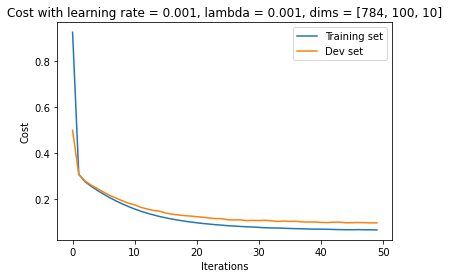

In [19]:
dims = [X_train.shape[0], 100, Y_train.shape[0]]
parameters = model(X_train, Y_train, X_val, Y_val, dims = dims, algos = 'adam', num_epochs = 500, print_cost = True, lambd = 0.001, mini_batch_size = 128)

# Prediction  

In [20]:
Y_pred_train, accur_train = predict(X_train, Y_train, parameters)
Y_pred_val, accur_val = predict(X_val, Y_val, parameters)
print('Prediction accuracy on training set: {} %'.format(accur_train))
print('Prediction accuracy on cross-validation set: {} %'.format(accur_val))

Prediction accuracy on training set: 99.16315789473684 %
Prediction accuracy on cross-validation set: 97.35000000000001 %


In [21]:
# Return training and cross-validation label vectors to original shape
Y_train = np.argmax(Y_train, axis = 0)
Y_val = np.argmax(Y_val, axis = 0)
print(Y_pred_train.shape, Y_train.shape, Y_pred_val.shape, Y_val.shape)

(38000,) (38000,) (4000,) (4000,)


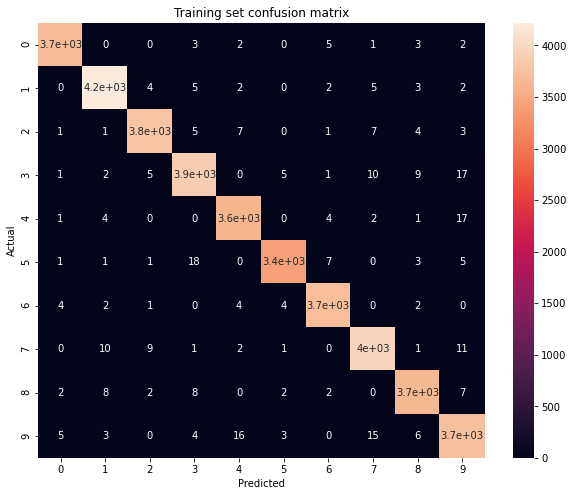

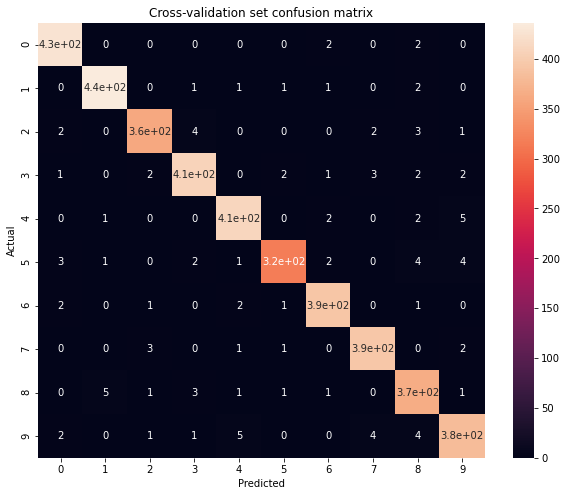

In [22]:
df_train = pd.DataFrame(data = {'Y_Actual_train':Y_train, 'Y_Pred_train':Y_pred_train})
df_val = pd.DataFrame(data = {'Y_Actual_val':Y_val, 'Y_Pred_val':Y_pred_val})
conf_matrix_train = pd.crosstab(df_train['Y_Actual_train'], df_train['Y_Pred_train'], rownames = ['Actual'], colnames = ['Predicted'])
conf_matrix_val = pd.crosstab(df_val['Y_Actual_val'], df_val['Y_Pred_val'], rownames = ['Actual'], colnames = ['Predicted'])
# Confusion matrix for training set
plt.figure(figsize = (10, 8))
sns.heatmap(data = conf_matrix_train, annot = True)
plt.title('Training set confusion matrix')
plt.show()
# Confusion matrix for training set
plt.figure(figsize = (10, 8))
sns.heatmap(data = conf_matrix_val, annot = True)
plt.title('Cross-validation set confusion matrix')
plt.show()

# Make submission

Making submission for Kaggle

In [23]:
test_data = pd.read_csv('../input/digit-recognizer/test.csv')
test_data = (test_data - test_data.mean(axis = 0)) / 255
X_test = test_data.T
Y_subm = predict(X_test, Y, parameters, comp_accur = False)
submission = pd.DataFrame(data = {'ImageId':list(i for i in range(1, len(Y_subm) + 1)), 'Label':Y_subm.T}).set_index('ImageId')
submission.to_csv('./submission.csv')